## **Ejercicio de Regresión Lineal Simple**

Costo médico Activos de Datos Personales
Pronóstico de seguros mediante regresión lineal
Acerca de Dataset

### **Contexto**

Machine Learning with R by Brett Lantz es un libro que proporciona una introducción al aprendizaje automático utilizando R. Por lo que puedo decir, Packt Publishing no pone a disposición de sus conjuntos de datos en línea a menos que compre el libro y cree una cuenta de usuario que puede ser un problema si usted está comprobando el libro de la biblioteca o tomando prestado el libro de un amigo. Todos estos conjuntos de datos son de dominio público, pero simplemente necesitaban algo de limpieza y codificación para que coincidiera con el formato del libro. Contenido

### **Columnas**

- edad: edad del beneficiario principal

- sexo: contratista de seguros género, mujer, hombre

- bmi: índice de masa corporal, que proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura, índice objetivo del peso corporal (kg / m 2) utilizando la relación de altura/peso, idealmente de 18,5 a 24,9

- niños: Número de niños cubiertos por el seguro de salud / Número de dependientes

- fumador: Fumar

- región: la zona residencial del beneficiario en EE.UU., noreste, sureste, suroeste, noroeste.

- Cargos: Costos médicos individuales facturados por seguro médico

Fuente: https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

### Paso 1: Cargar las librerias

In [38]:
# Librerias para operaciones matemáticas/estadisticas/estructuras de datos
import numpy as np
# Libreria para el manejo de datos
import pandas as pd
# Libreria para gráficas 2D
import matplotlib.pyplot as plt
# Libreria para gráficas 3D
import seaborn as sb
# Libreria para la transformación de la data
from sklearn.preprocessing import LabelEncoder
# Libreria para la normalización
from sklearn.preprocessing import normalize
# Libreria para separar la data
from sklearn.model_selection import train_test_split
# Libreria para el modelo de predicción
from sklearn.linear_model import LinearRegression
# libreria para las métricas de evaluación del modelo
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Paso 2: Cargar la data

In [8]:
data = pd.read_csv("insurance.csv", sep=",")

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Paso 3: Preprocesamiento

In [10]:
# Revisar los valores NaN
print("Column   NaN")
data.isnull().sum()

# Eliminar valores NaN
#data.dropna()

Column   NaN


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [13]:
# Generando las estadísticas
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
# Se realiza la transformación de los datos (cadena --> numérico)
le = LabelEncoder()

data['genero'] = le.fit_transform( data['sex'] )
data['fumador'] = le.fit_transform( data['smoker'] )
data['ciudad'] = le.fit_transform( data['region'] )

data

,age,sex,bmi,children,smoker,region,charges,genero,fumador,ciudad
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


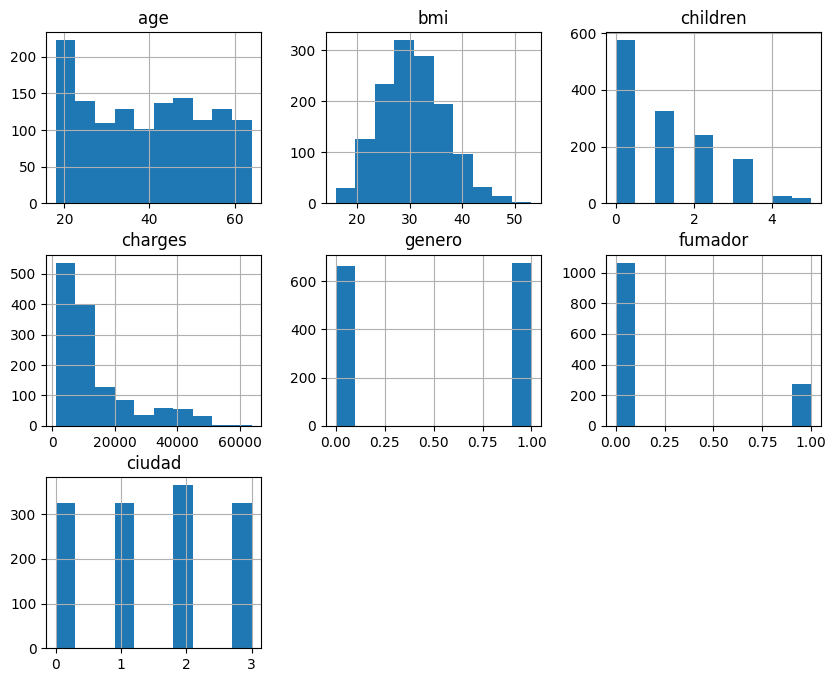

In [24]:
# Se genera un histograma, para ver la distribucion de los datos
data.hist()
plt.rcParams['figure.figsize'] = (10, 8)
plt.show()

In [28]:
# Se crea un dataframe nuevo solo con las columnas de tipo numérica
data_new = pd.concat([ data['age'], data['bmi'], data['children'], data['charges'], data['genero'], data['fumador'], data['ciudad'] ], axis=1)

data_new

,age,bmi,children,charges,genero,fumador,ciudad
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [30]:
# Se genera la normalización de los datos
data_normalize = normalize(data_new)

data_normalize

array([[1.12526190e-03, 1.65235827e-03, 0.00000000e+00, ...,
        0.00000000e+00, 5.92243106e-05, 1.77672932e-04],
       [1.04288680e-02, 1.95657151e-02, 5.79381554e-04, ...,
        5.79381554e-04, 0.00000000e+00, 1.15876311e-03],
       [6.29259576e-03, 7.41627357e-03, 6.74206688e-04, ...,
        2.24735563e-04, 0.00000000e+00, 4.49471125e-04],
       ...,
       [1.10405699e-02, 2.26025000e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.22672999e-03],
       [1.04570071e-02, 1.28471802e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.49385816e-03],
       [2.09323914e-03, 9.97548554e-04, 0.00000000e+00, ...,
        0.00000000e+00, 3.43153957e-05, 3.43153957e-05]])

In [31]:
# Se convierte el array en un dataframe
data_normalize = pd.DataFrame( data_normalize, columns = data_new.columns )

data_normalize

,age,bmi,children,charges,genero,fumador,ciudad
0,0.001125,0.001652,0.000000,0.999998,0.000000,0.000059,0.000178
1,0.010429,0.019566,0.000579,0.999753,0.000579,0.000000,0.001159
2,0.006293,0.007416,0.000674,0.999952,0.000225,0.000000,0.000449
3,0.001501,0.001033,0.000000,0.999998,0.000045,0.000000,0.000045
4,0.008275,0.007468,0.000000,0.999938,0.000259,0.000000,0.000259
...,...,...,...,...,...,...,...
1333,0.004717,0.002922,0.000283,0.999985,0.000094,0.000000,0.000094
1334,0.008159,0.014468,0.000000,0.999862,0.000000,0.000000,0.000000
1335,0.011041,0.022602,0.000000,0.999683,0.000000,0.000000,0.001227
1336,0.010457,0.012847,0.000000,0.999862,0.000000,0.000000,0.001494


### Paso 4: Se genera la correlación y se selecciona la variable independiente (x) y la dependiente (y)

<Axes: >

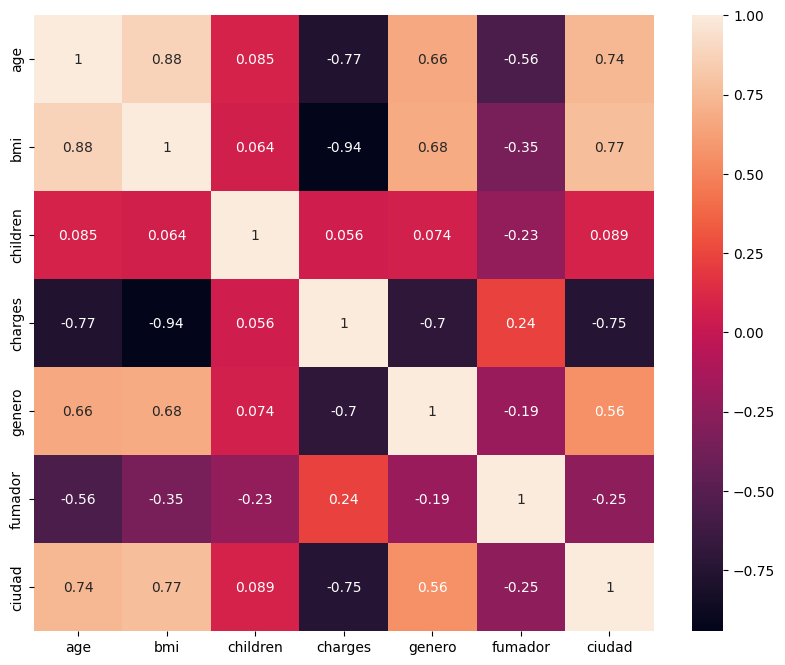

In [39]:
# Se aplica la correlación de pearson
matriz = data_normalize.corr(method='pearson')

sb.heatmap(matriz, annot=True)

<Axes: >

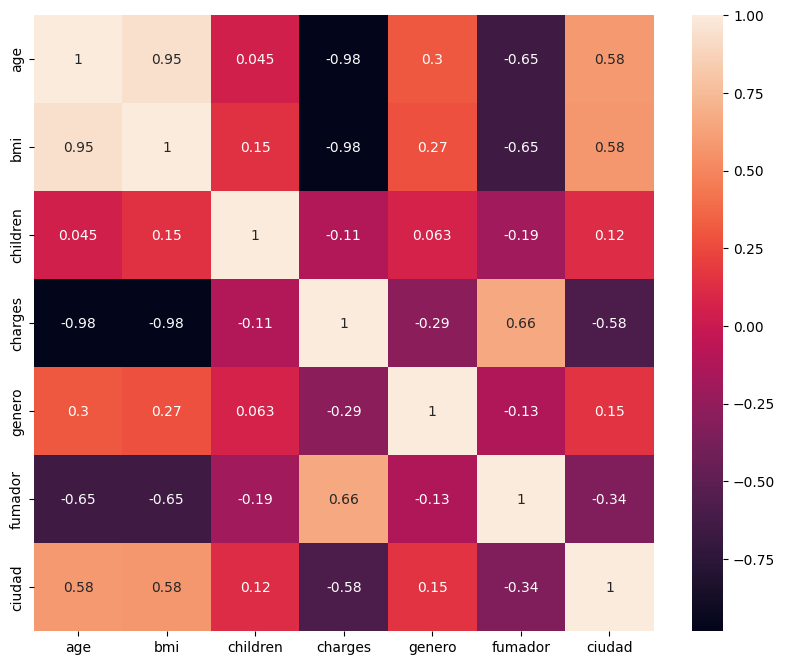

In [40]:
# Se aplica la correlación de spearman
matriz = data_normalize.corr(method='spearman')

sb.heatmap(matriz, annot=True)

<Axes: >

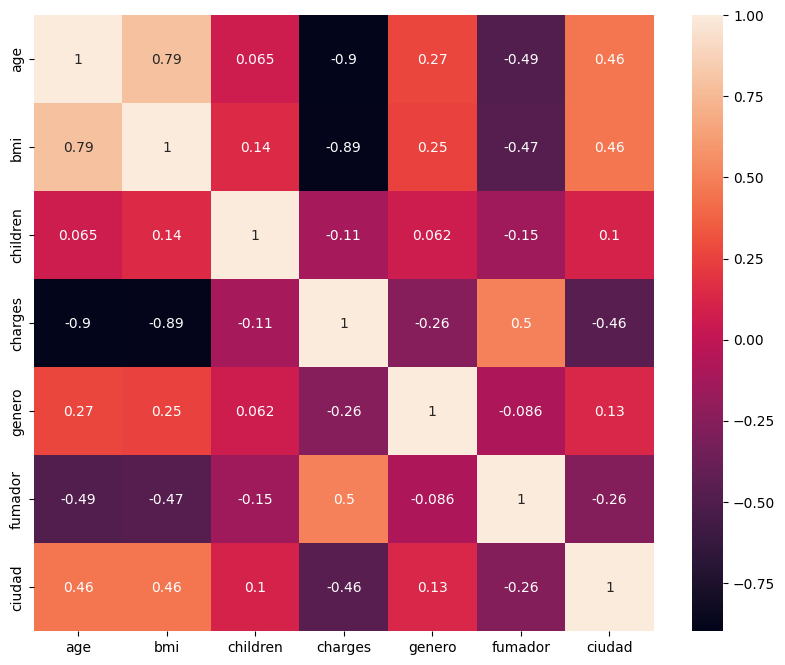

In [41]:
# Se aplica la correlación de kendall
matriz = data_normalize.corr(method='kendall')

sb.heatmap(matriz, annot=True)

### Paso 5: Separación de los datos de entrenamiento y pruebas

In [84]:
# Variable X (independiente)
feature = ['bmi']
# Variable y (dependiente)
target = ['charges']
X = data_normalize[feature]
y = data_normalize[target]

# Se separa la data en 80% para entrenemiento y 20% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Paso 6: Se genera la predicción

In [85]:
# Se selecciona el algoritmo para la predicción
lr = LinearRegression()

# Se genera el entrenamiento del modelo
lr.fit(X_train, y_train)

# Se genera la predicción
predict = lr.predict(X_test)

# Se generan las metricas de evaluación del modelo
print(f"R2 = {r2_score(y_test, predict):.3}")
print(f"MAE = {mean_absolute_error(y_test, predict):.2}")
print(f"MSE = {mean_squared_error(y_test, predict):.2}")

R2 = 0.898
MAE = 1.9e-05
MSE = 7.5e-10


### Paso 7: Gráfica de la predicción

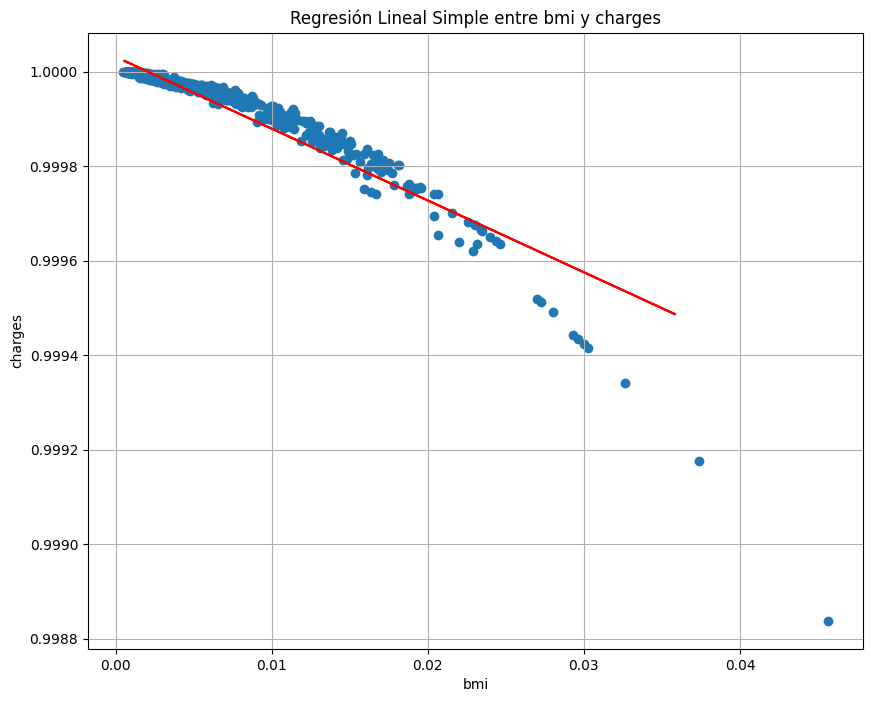

In [91]:
plt.scatter(X_train['bmi'], y_train['charges'])
plt.plot(X_test, predict, color="red")
plt.title("Regresión Lineal Simple entre bmi y charges")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.grid()
plt.show()